In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for wordcloud making and image importing
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# And libraries for data transformation
import datetime

#words counter
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.tokenize import word_tokenize


# sentiment 
from textblob import TextBlob


In [2]:
# load data
df = pd.read_csv('tweets/sample1.csv')
df.head()

,screen_name,created_at,location,source,hashtags,text
0,gregsalamone,2020-04-20 21:09:21,"Massachusetts, USA",Twitter Web App,NaN,@realDonaldTrump How long after your Redneck R...
1,1portabella,2020-04-20 21:09:21,"California, USA",Twitter for Android,NaN,New episode\n\n“The lost month of February” is...
2,paulzak,2020-04-20 21:09:21,"California, USA",Twitter Web App,NaN,Guys like @BrianKempGA are gonna maximize the ...
3,kristafrances,2020-04-20 21:09:21,"San Diego, California",Twitter for iPad,NaN,"In Michigan, net approval of Whitmer's handlin..."
4,norsenorn,2020-04-20 21:09:21,apache junction AZ,Twitter Web App,NaN,"Arizona has done 51,000 COVID-19 tests. The st..."


# 1. Data preprocess

In [3]:
# Get length of review for Exploratory data analysis (EDA)
df['text_length'] = df['text'].apply(lambda x: len(x))

Text(0.5, 1.0, 'Distribution of review length')

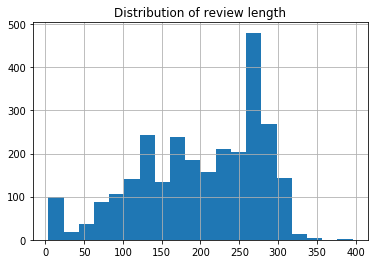

In [4]:
# And take a look at the distribution of the length
df['text_length'].hist(bins=20)
plt.title('Distribution of review length')

In [5]:
from string import punctuation
from nltk.corpus import stopwords

# Transform string data and remove punctuation and stop words
df['text_clean'] = df['text']
# lower case
df['text_clean'] = df['text_clean'].apply(lambda x: str(x).lower())
# remove punctuation
df['text_clean'] = df['text_clean'].apply(lambda x: x.translate(str.maketrans('', '', punctuation)))
# remove stop words
nltk_stop = stopwords.words('english')                                          
df['text_clean'] = df['text_clean'].apply(lambda x: ' '.join([c for c in x.split() if c not in nltk_stop]))

In [6]:
# Check the data again
df.head()

,screen_name,created_at,location,source,hashtags,text,text_length,text_clean
0,gregsalamone,2020-04-20 21:09:21,"Massachusetts, USA",Twitter Web App,NaN,@realDonaldTrump How long after your Redneck R...,88,realdonaldtrump long redneck rally real covid1...
1,1portabella,2020-04-20 21:09:21,"California, USA",Twitter for Android,NaN,New episode\n\n“The lost month of February” is...,304,new episode “the lost month february” left’s n...
2,paulzak,2020-04-20 21:09:21,"California, USA",Twitter Web App,NaN,Guys like @BrianKempGA are gonna maximize the ...,151,guys like briankempga gonna maximize human eco...
3,kristafrances,2020-04-20 21:09:21,"San Diego, California",Twitter for iPad,NaN,"In Michigan, net approval of Whitmer's handlin...",164,michigan net approval whitmers handling corona...
4,norsenorn,2020-04-20 21:09:21,apache junction AZ,Twitter Web App,NaN,"Arizona has done 51,000 COVID-19 tests. The st...",132,arizona done 51000 covid19 tests state needs d...


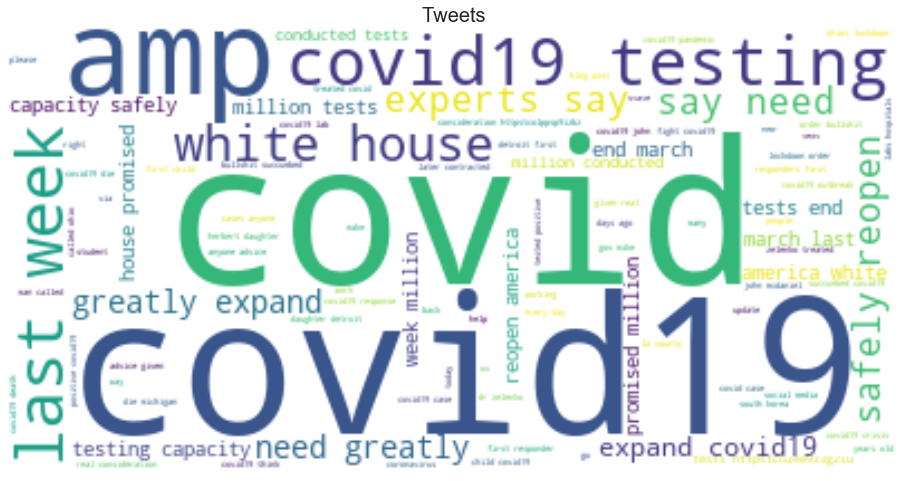

In [7]:
#words cloud of most comman words 
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'].tolist())

wordcloud = WordCloud(background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Tweets',size=20)
plt.show()

# 2. Sentiment
Use testblob for sentiment analysis

In [8]:
# TextBlob stands on the giant shoulders of NLTK and pattern, and plays nicely with both.
# Here, we only extract polarity as it indicates the sentiment 
# as value nearer to 1 means a positive sentiment 
# values nearer to -1 means a negative sentiment. 
# This can also work as a feature for building a machine learning model.
df['sentiment_score'] = df['text_clean'].apply(lambda x: TextBlob(x).sentiment[0])
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')
df['sentiment_category'] = df['sentiment_score'].apply(lambda x: 1 if x > 0 else 2 if x < 0 else 0)
df[['text_clean','sentiment_score', 'sentiment', 'sentiment_category']].head()

,text_clean,sentiment_score,sentiment,sentiment_category
0,realdonaldtrump long redneck rally real covid1...,0.075000,positive,1
1,new episode “the lost month february” left’s n...,0.094545,positive,1
2,guys like briankempga gonna maximize human eco...,0.103571,positive,1
3,michigan net approval whitmers handling corona...,0.125000,positive,1
4,arizona done 51000 covid19 tests state needs d...,0.250000,positive,1


In [9]:
df.head()

,screen_name,created_at,location,source,hashtags,text,text_length,text_clean,sentiment_score,sentiment,sentiment_category
0,gregsalamone,2020-04-20 21:09:21,"Massachusetts, USA",Twitter Web App,NaN,@realDonaldTrump How long after your Redneck R...,88,realdonaldtrump long redneck rally real covid1...,0.075000,positive,1
1,1portabella,2020-04-20 21:09:21,"California, USA",Twitter for Android,NaN,New episode\n\n“The lost month of February” is...,304,new episode “the lost month february” left’s n...,0.094545,positive,1
2,paulzak,2020-04-20 21:09:21,"California, USA",Twitter Web App,NaN,Guys like @BrianKempGA are gonna maximize the ...,151,guys like briankempga gonna maximize human eco...,0.103571,positive,1
3,kristafrances,2020-04-20 21:09:21,"San Diego, California",Twitter for iPad,NaN,"In Michigan, net approval of Whitmer's handlin...",164,michigan net approval whitmers handling corona...,0.125000,positive,1
4,norsenorn,2020-04-20 21:09:21,apache junction AZ,Twitter Web App,NaN,"Arizona has done 51,000 COVID-19 tests. The st...",132,arizona done 51000 covid19 tests state needs d...,0.250000,positive,1


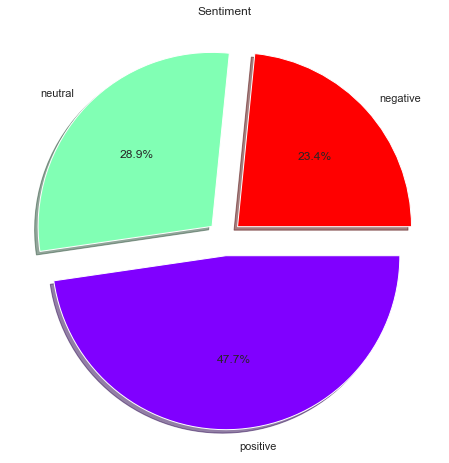

In [10]:
import matplotlib.cm as cm
plt.figure(figsize=(8,8))
#count data rating
counts = df['sentiment'].value_counts()
#rating pie
values = counts.values
labels = counts.index
explode = (0.1, 0.1, 0.1)
colors = cm.rainbow(np.linspace(0, 1, len(labels)))
plt.pie(values, 
        colors=colors, 
        labels=labels,
        explode=explode, 
        autopct='%1.1f%%',
        counterclock=False,
        shadow=True)
plt.title('Sentiment')
plt.show()

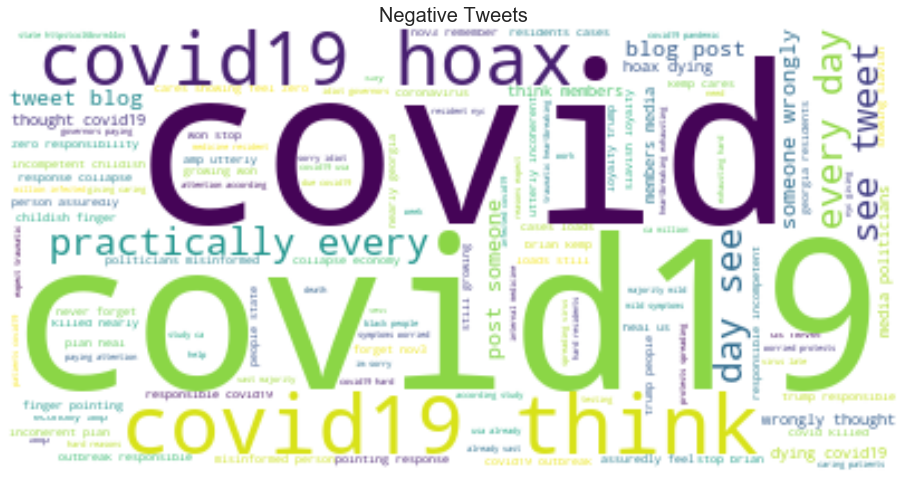

In [11]:
#words cloud of most comman words from negative tweets
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'][df['sentiment']=='negative'].tolist())

wordcloud = WordCloud(background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Negative Tweets',size=20)
plt.show()

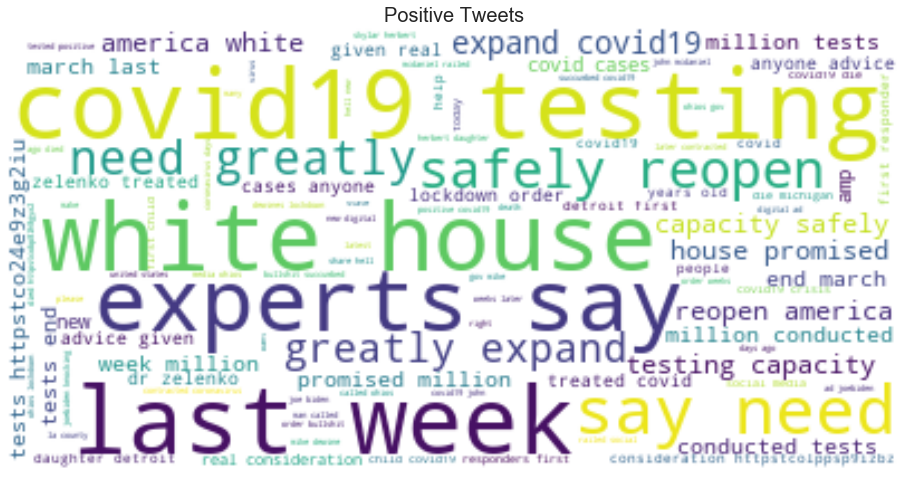

In [12]:
#words cloud of most comman words from positive tweets
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'][df['sentiment']=='positive'].tolist())

wordcloud = WordCloud(background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Positive Tweets',size=20)
plt.show()

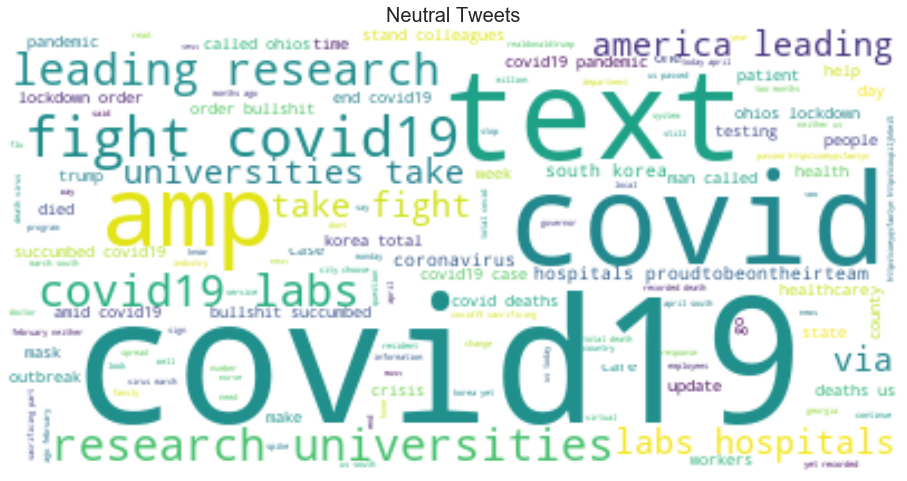

In [13]:
#words cloud of most comman words from neutral tweets
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'][df['sentiment']=='neutral'].tolist())

wordcloud = WordCloud(background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Neutral Tweets',size=20)
plt.show()